In [1]:
from project.models.char_baseline import CharSeqBaseline
from project.models.code2vec_solo import Code2VecSolo
from project.models.code2vec_encoder import Code2VecEncoder
from project.models.base_model import _run_model


/home/ehambro/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
load_dir = {"logdir":"logs/second_experiment_70dim/second_experiment__var_funcname_otherargs_0808_060151/best_cross_ent", "mode":"RETURN"}
LOADED = _run_model(CharSeqBaseline, **load_dir)


LOADING FROM: logs/second_experiment_70dim/second_experiment__var_funcname_otherargs_0808_060151/best_cross_ent, overwriting kwargs


Loading GloVe weights and word to index lookup table


400000it [00:07, 52036.03it/s]


Creating char to index look up table
Tokenizing the word descriptions and characters
Tokenizing the src code
Extracting tensors train and test
INFO:tensorflow:Restoring parameters from logs/second_experiment_70dim/second_experiment__var_funcname_otherargs_0808_060151/best_cross_ent/BasicModel.ckpt-2337


0818_18:06 WARNING - Loaded from logs/second_experiment_70dim/second_experiment__var_funcname_otherargs_0808_060151/best_cross_ent: Global Step 2337


In [3]:
sess, nn, data_tuple, step = LOADED

In [4]:
# RESULTS = nn.evaluate_bleu(sess, data_tuple.test, max_translations=10000)

In [5]:
import random
import numpy as np
from tqdm import tqdm 
from project.external.nmt import bleu


def prep_samples(translations, sample_size, no_samples):
    for n in range(no_samples):
        yield  random.choices(translations, k=sample_size)
        
def get_translations(nn, data):
    return nn.evaluate_bleu(sess, data, max_translations=10000)

def get_bleu_bootstrap(translations, sample_size = 1000, no_samples = 1000):
    bleu_bootstrap = []
    total = []
    for sample in prep_samples(translations, sample_size, no_samples):
        all_references = [[t.description] for t in sample]
        all_translations = [t.translation for t in sample ]
        b = bleu.compute_bleu(all_references, all_translations, max_order=4, smooth=False)
        bleu_bootstrap.append(b[0]*100)
    return bleu_bootstrap
    

In [6]:
T  = get_translations(nn, data_tuple.test)

In [7]:
bleu_bootstrap = get_bleu_bootstrap(T[-1], sample_size=1000, no_samples=1000)

In [8]:
print("{:.5f}, {:.5f}".format(np.mean(bleu_bootstrap), np.std(bleu_bootstrap)))

print("{:.5f}, {:.5f}".format(np.mean(sorted(bleu_bootstrap)[25:-25]), np.std(sorted(bleu_bootstrap)[25:-25])))

6.20015, 0.54948
6.19471, 0.47721


In [9]:
from project.data.preprocessed.no_dups_1 import no_dups_1_data

raw_data = no_dups_1_data() 

In [10]:
import pickle
from collections import namedtuple

Examples = namedtuple("Examples", ["translations", "data_tuple"])
def find_examples(translations, data_tuple):
    return_index = []
    return_data = [[] for  _ in data_tuple.test]
    for t in translations:
        for i,d in enumerate(data_tuple.test[-1]):
            arg_name = "".join(nn.translate(data_tuple.test[0][i], lookup=nn.idx2char, do_join=False))
            if d == t.description and arg_name == t.name:
                return_index.append(i)
    
    for j in return_index:
        for k, d in enumerate(return_data):
            d.append(data_tuple.test[k][j])
    
    return [np.stack(x) for x in return_data[:-1]] + [return_data[-1]]

def load_examples(name):
    with open("examples/{}.eg.pkl".format(name), 'rb') as f:
         examples = pickle.load(f)
    return examples

def save_examples(name, good_data_tuple):
    with open("examples/{}.eg.pkl".format(name), 'wb') as f:
        pickle.dump(good_data_tuple, f)


### 2 Funcname Otherargs

In [47]:
good_examples = [T[3][i] for i in [10, 12, 23, 83, 192, 213, 237, 240, 247, 263]]
data_examples = find_examples(good_examples, data_tuple)        
egs = Examples(good_examples,data_examples )
        
egs = load_examples('second_exp_funcname_otherargs')

In [77]:
np.arange(4), 

array([5, 6, 7, 8])

(19, 120)


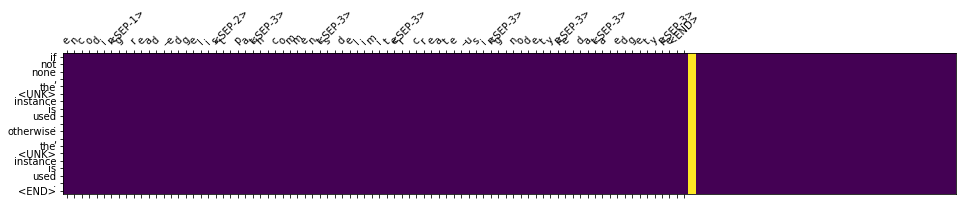

In [55]:
import tensorflow as tf
from matplotlib import pyplot as plt
j = 3
just_one = [ i[j:j+1] for i in egs ]

# just_one[0][0][36] = 0
# just_one[0][0][35] = 0
# just_one[0][0][34] = 0
# just_one[0][0][2:33] = 0
alignments, translate = nn._feed_fwd(sess, just_one, [nn.inf_state.alignment_history.stack(), nn.inference_id] )
char_input = nn.translate(just_one[0][0], lookup=nn.idx2char, do_join=False)
word_output = nn.translate(translate[0], do_join=False)
# print(np.trim_zeros(just_one[0][0]).shape)


moved = np.squeeze(alignments)
moved = moved.transpose(1,0)
n = np.linalg.norm(moved, axis=0)
moved = (moved/n).transpose(1,0)
plt.matshow(moved)
plt.xticks(np.arange(len(char_input)), char_input, rotation=45)
plt.yticks(np.arange(len(word_output)), word_output)
print(moved.shape)
plt.show()
np.arg

In [42]:
just_one[0][0][36] = 0
len(np.trim_zeros(just_one[0][0]))
just_one[0]

array([[19, 65,  9, 19, 63, 12, 15,  3,  1, 12, 12, 24, 63, 11, 63,  5,
         4,  7,  5, 63,  3, 15, 14, 14,  5,  3, 20,  5,  4, 66, 33, 67,
        20,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0]])

In [78]:
just_one

[array([[ 5, 14,  3, 15,  4,  9, 14,  7, 65, 18,  5,  1,  4, 63,  5,  4,
          7,  5, 12,  9, 19, 20, 66, 16,  1, 20,  8, 67,  3, 15, 13, 13,
          5, 14, 20, 19, 67,  4,  5, 12,  9, 13,  9, 20,  5, 18, 67,  3,
         18,  5,  1, 20,  5, 63, 21, 19,  9, 14,  7, 67, 14, 15,  4,  5,
         20, 24, 16,  5, 67,  4,  1, 20,  1, 67,  5,  4,  7,  5, 20, 24,
         16,  5, 67, 68,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
          0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
          0,  0,  0,  0,  0,  0,  0,  0]]),
 array([[40002,  8330,    43, 23622,     5,   235,    62,  2186,  2855,
             3, 40003,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,
             

In [ ]:
# 10, 12, 23, 83, 192, 213, 237, 240, 247, 263, 
for i, t in enumerate(good_examples):
    print(i,t)

In [ ]:
char_embeddings = nn.get_scope_variable(sess, 'embed_vars', 'char_embed')

In [ ]:
len(data_tuple.test[-1])


In [ ]:
#"\n".join("\t".join([str(j) for j in i]) for i in char_embeddings[0]) 
print("\n".join(["Char"] + [nn.idx2char[i] for i in sorted(nn.idx2char.keys())]))
